In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import os

In [4]:
gml_files = [f for f in os.listdir("../data/internal/networks") if f.endswith(".gml")]

graphs = [nx.read_gml(os.path.join("../data/internal/networks", path)) for path in gml_files]

sample_path = "all_members_14days.gml"
sample_graph = [nx.read_gml(os.path.join("../data/internal/networks", sample_path))]

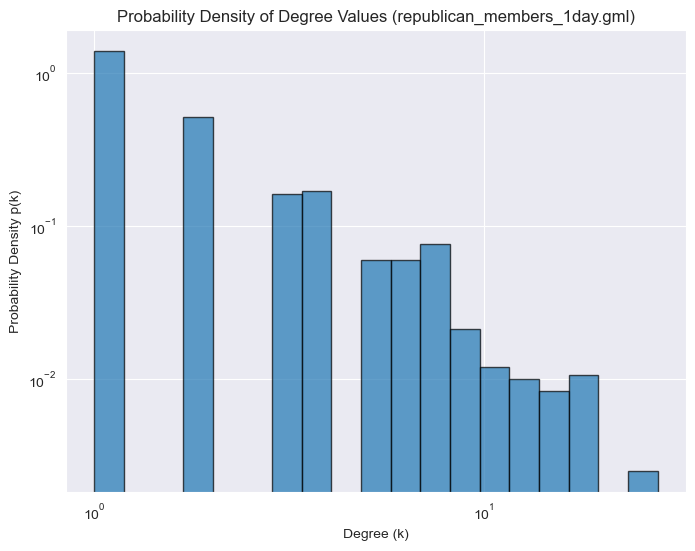

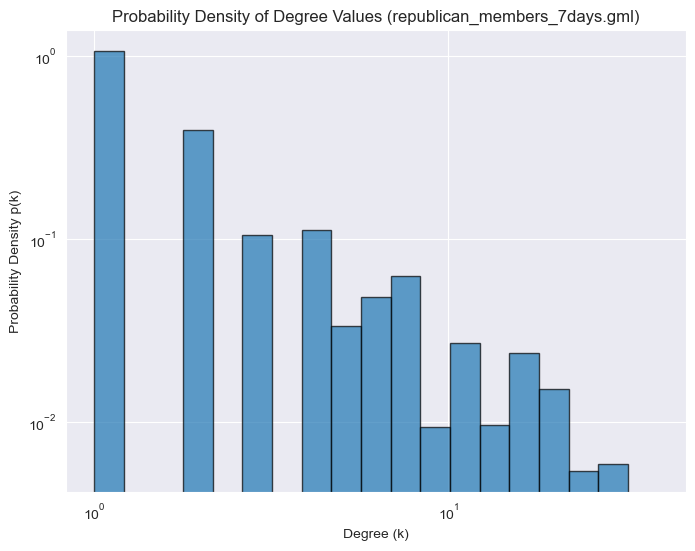

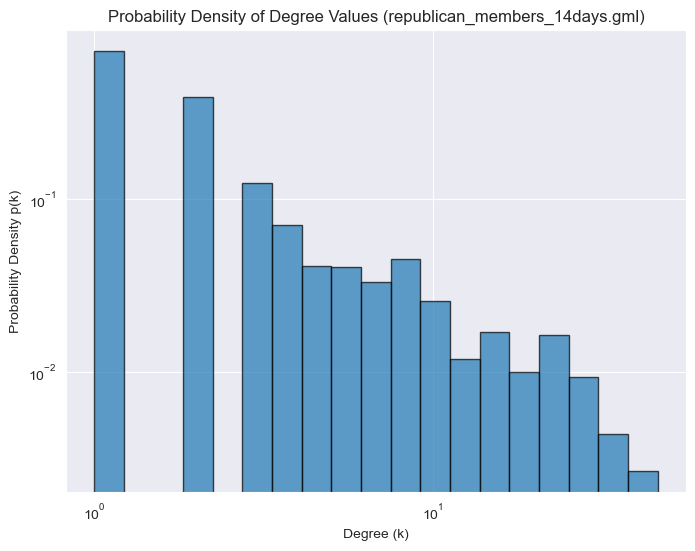

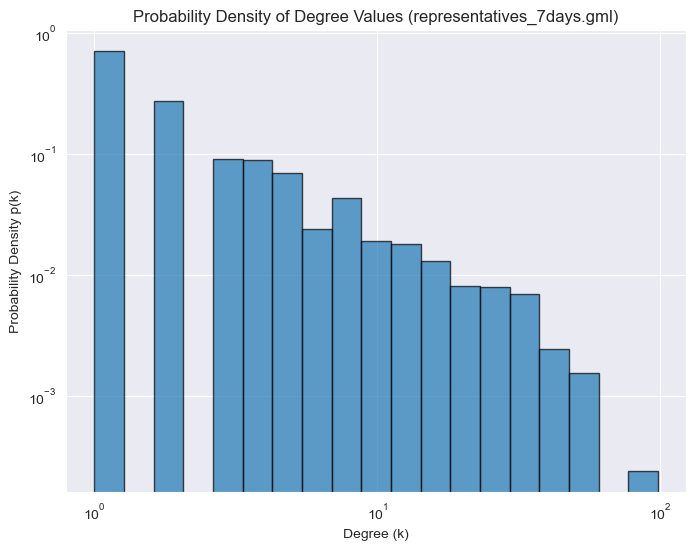

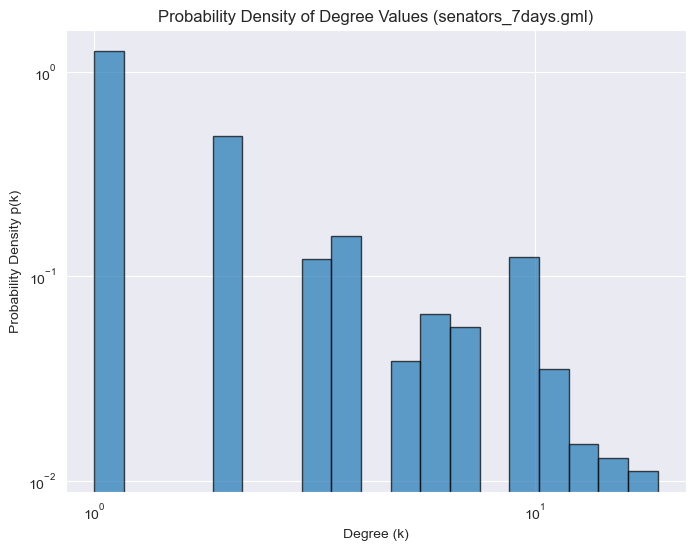

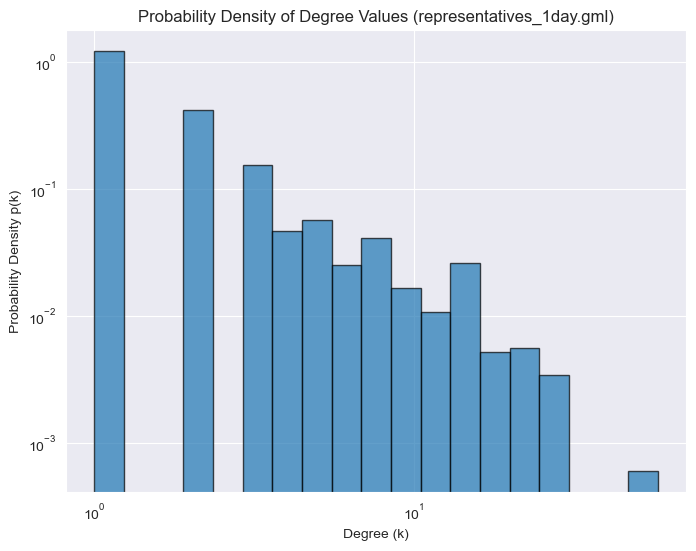

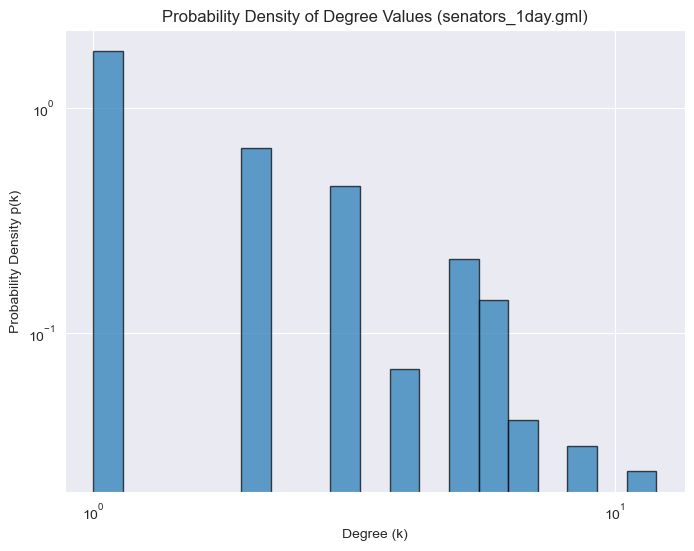

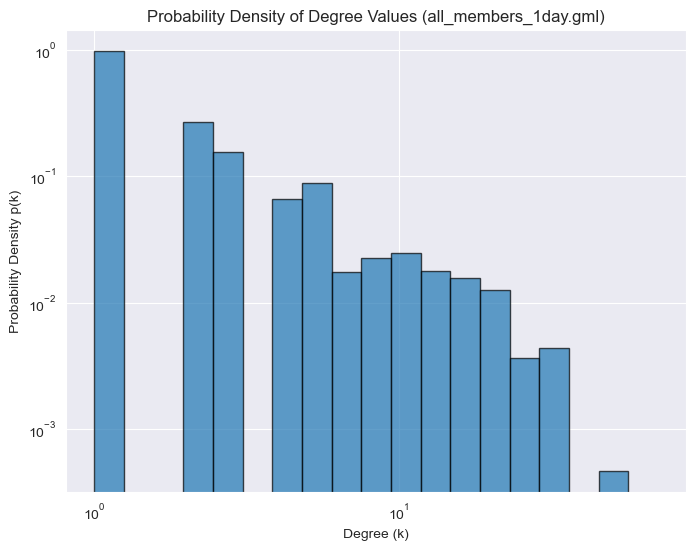

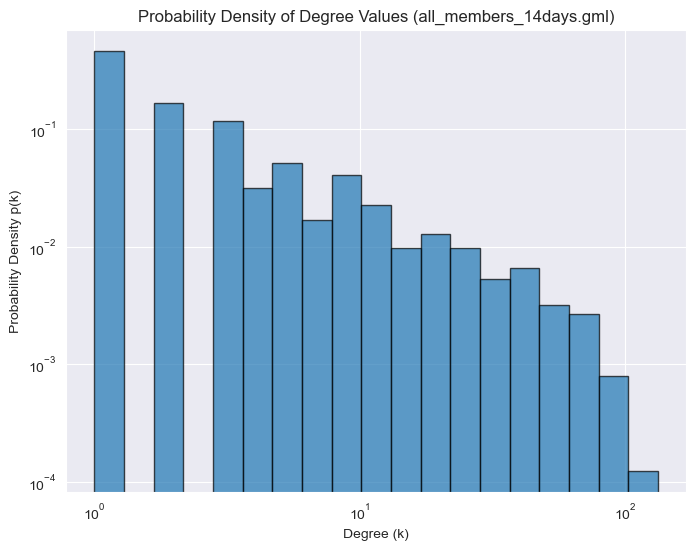

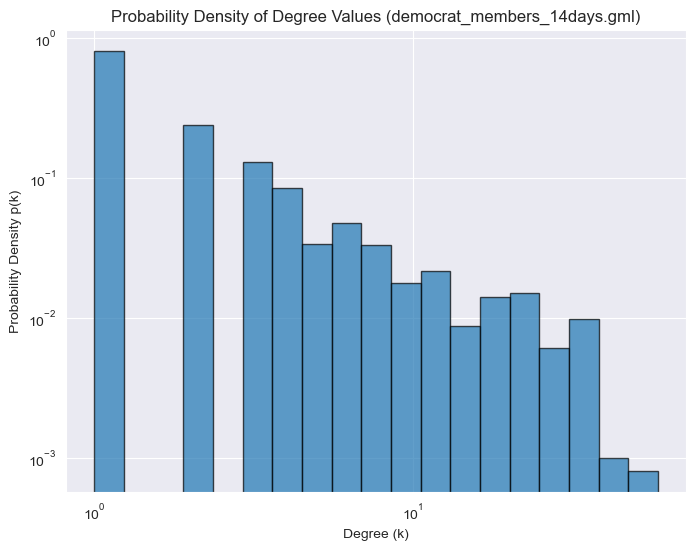

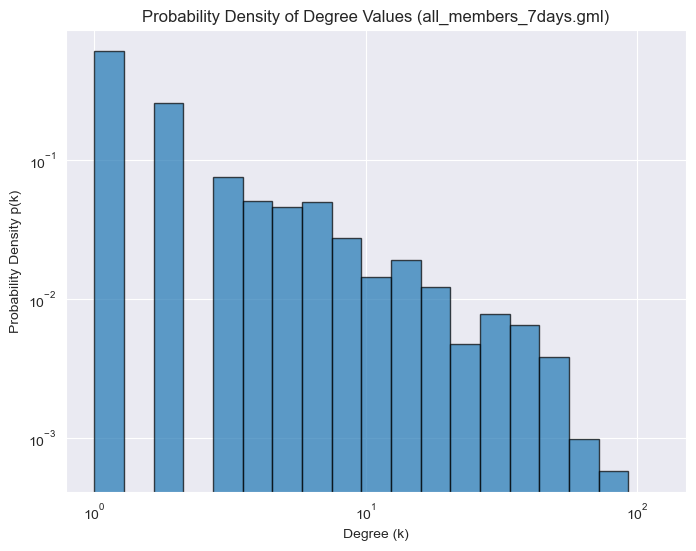

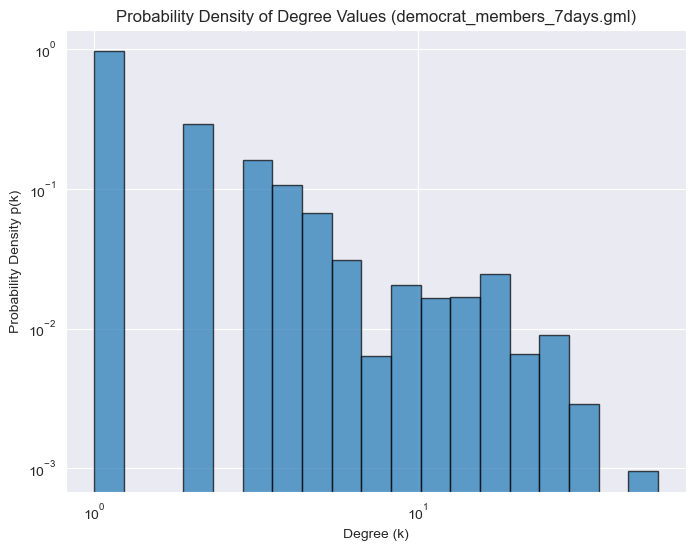

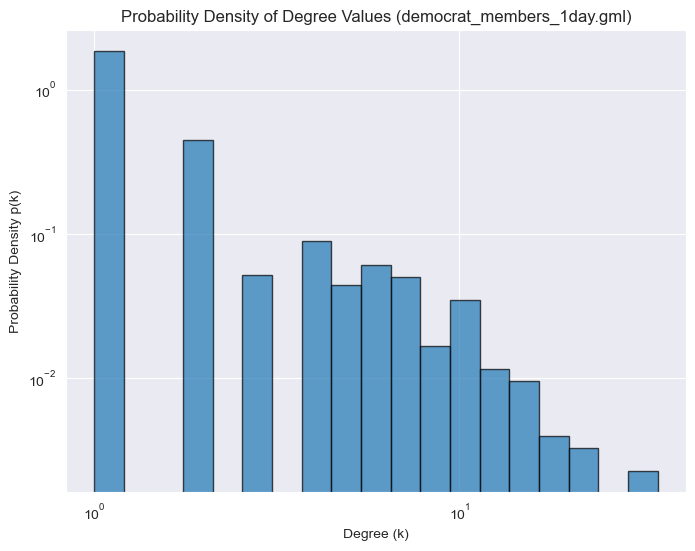

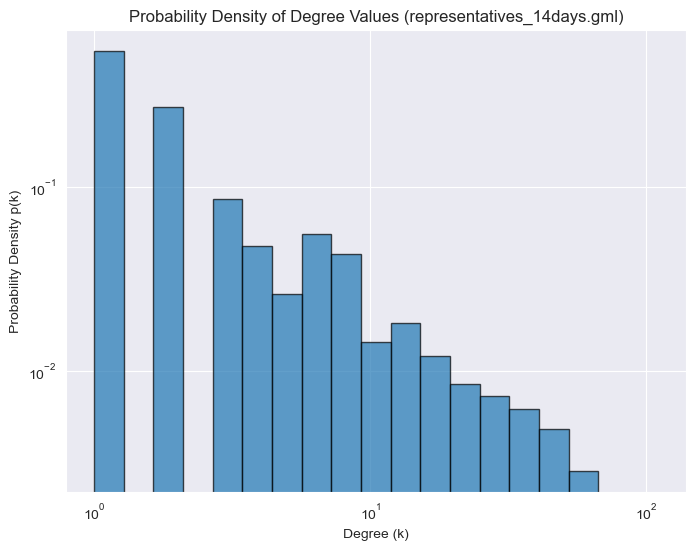

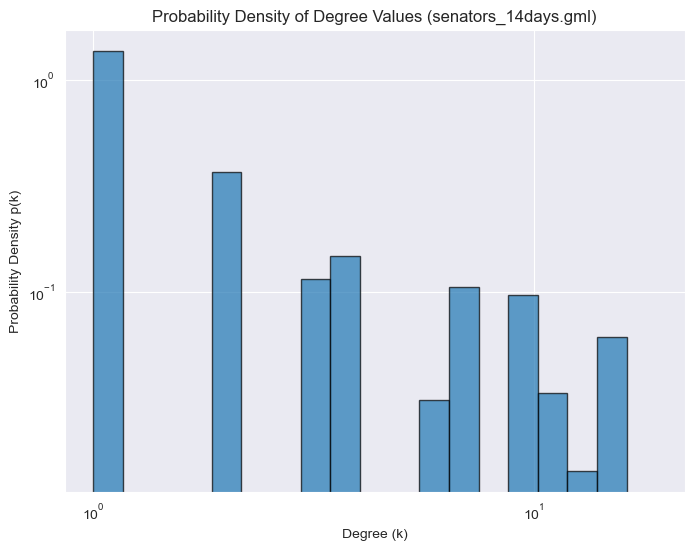

In [13]:
def plot_degree_distribution(graphs):
    for i, g in enumerate(graphs):
        degrees = [degree for node, degree in g.degree()]
        degrees = [d for d in degrees if d > 0]

        min_degree = min(degrees)
        max_degree = max(degrees)

        bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=20)

        plt.figure(figsize=(8, 6))
        plt.hist(degrees, bins=bins, density=True, edgecolor="black", alpha=0.7)

        plt.xscale("log")
        plt.yscale("log")

        plt.xlabel("Degree (k)")
        plt.ylabel("Probability Density p(k)")
        plt.title(f"Probability Density of Degree Values ({gml_files[i]})")
        plt.show()


plot_degree_distribution(graphs)


In [ ]:
annd_graphs = [nx.average_neighbor_degree(g) for g in graphs]
degrees_graphs = [dict(g.degree()) for g in graphs]

def plot_knn_against_k(graphs: list, degrees: list, annd: list):
    for i, g in enumerate(graphs):
        x, y = zip(*[(degrees[i][n], annd[i][n]) for n in g.nodes()])
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y)
        plt.xlabel("Degree (k)")
        plt.ylabel("Average Neighbor Degree (knn(k))")
        plt.title(f"Scatter plot of knn(k) vs Degree (k) {gml_files[i]}")
        plt.show

plot_knn_against_k(graphs, degrees_graphs, annd_graphs)

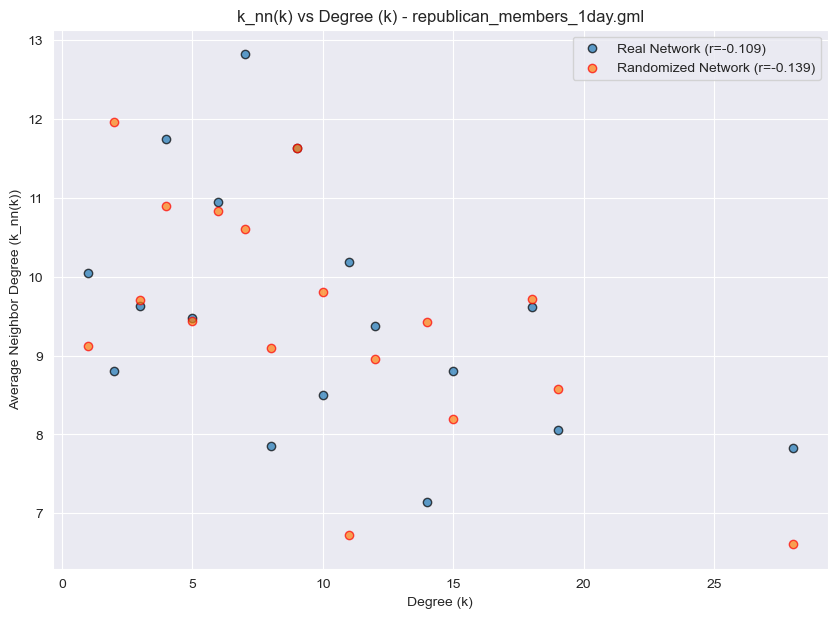

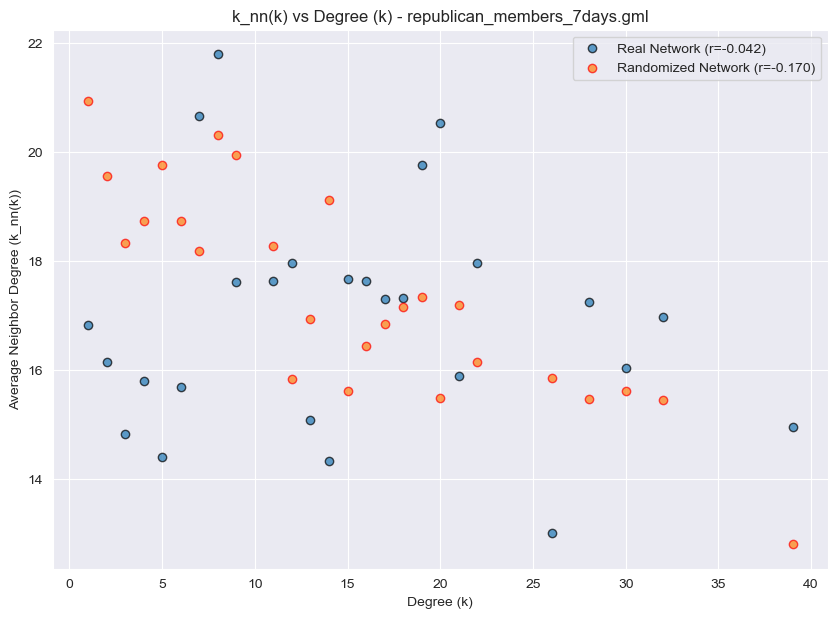

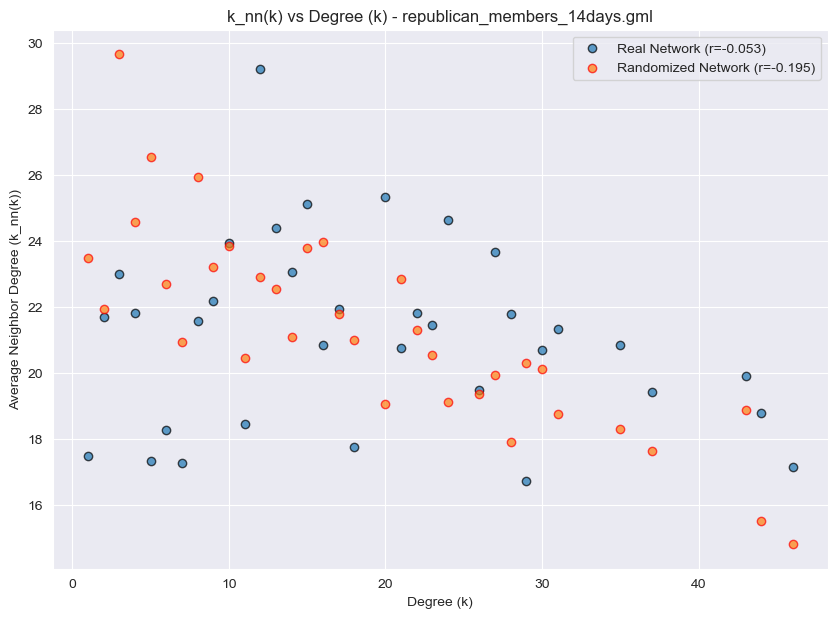

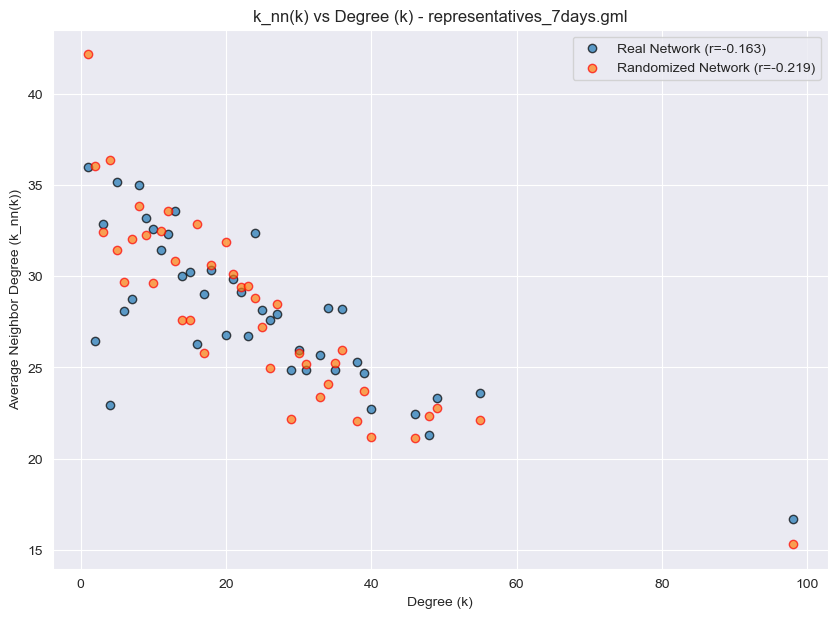

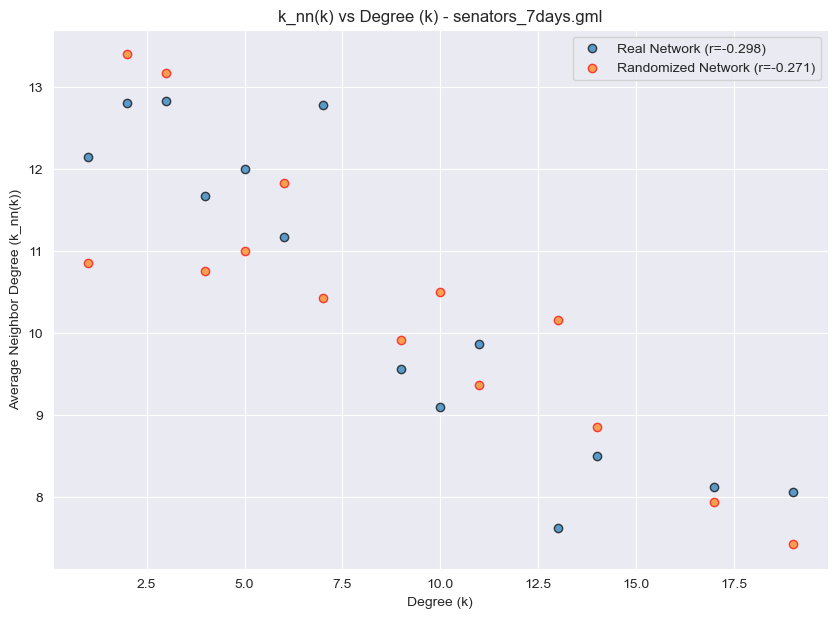

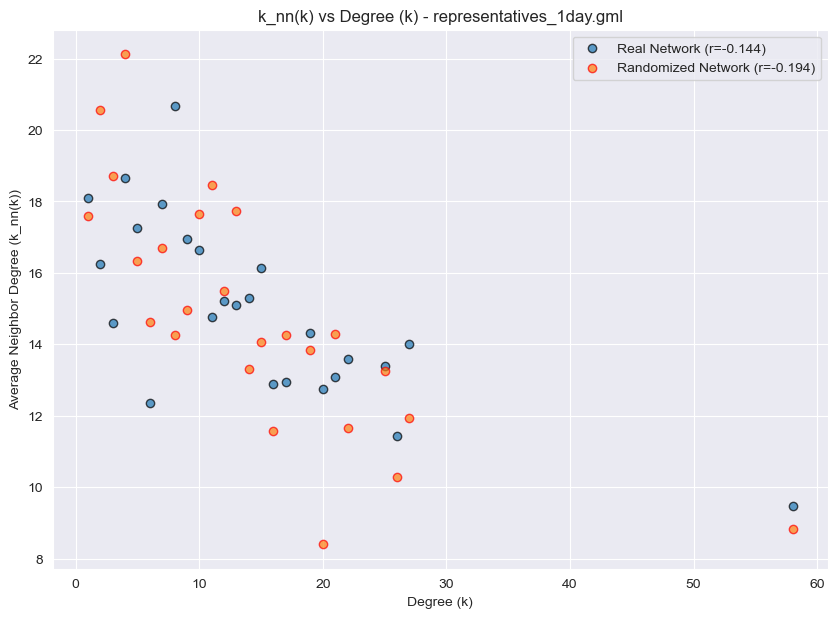

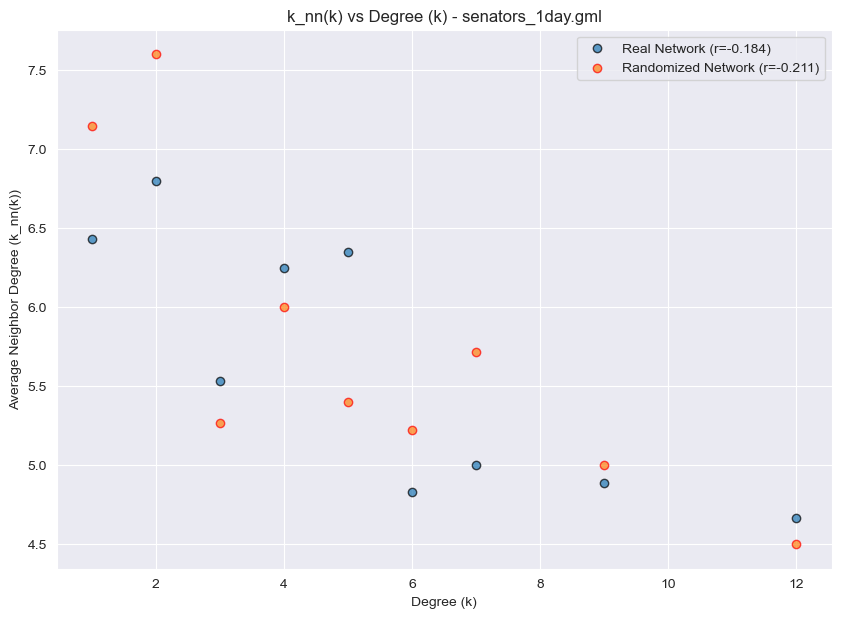

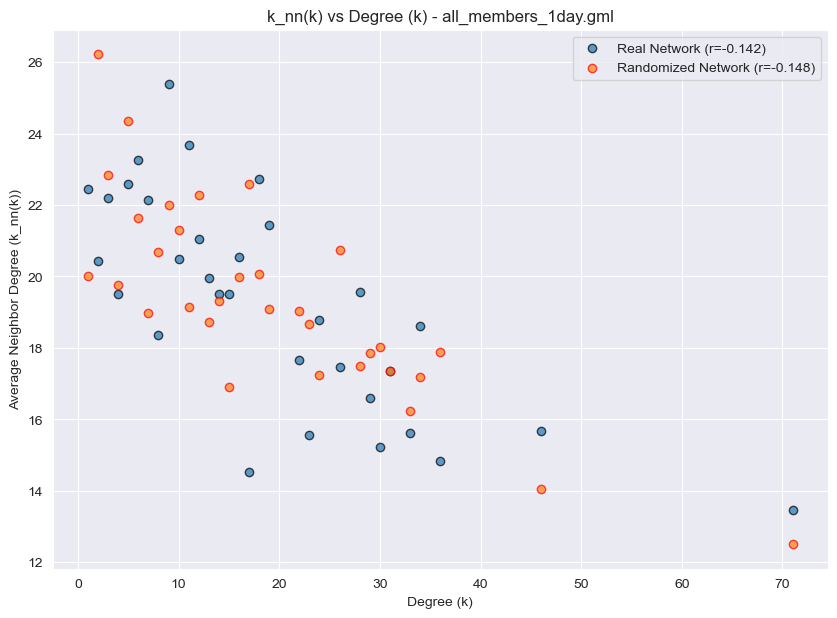

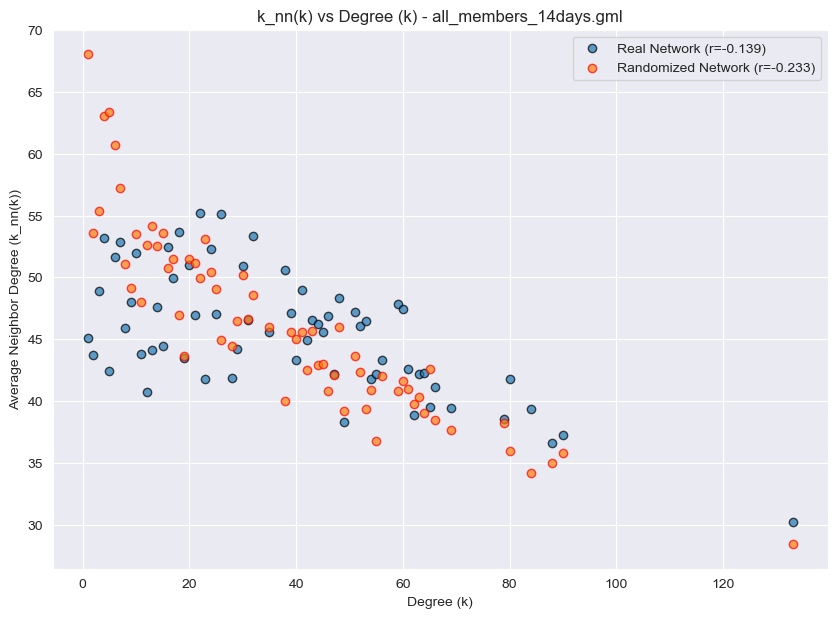

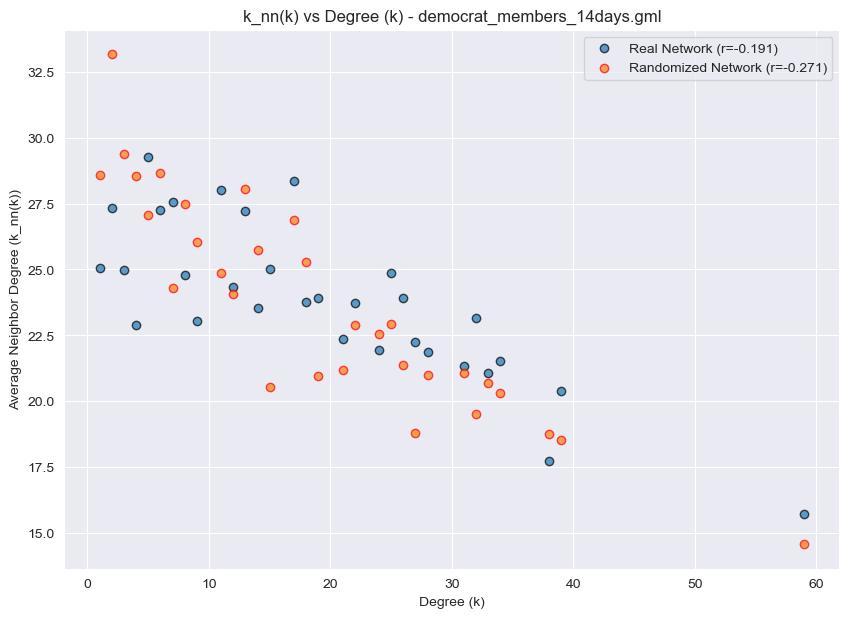

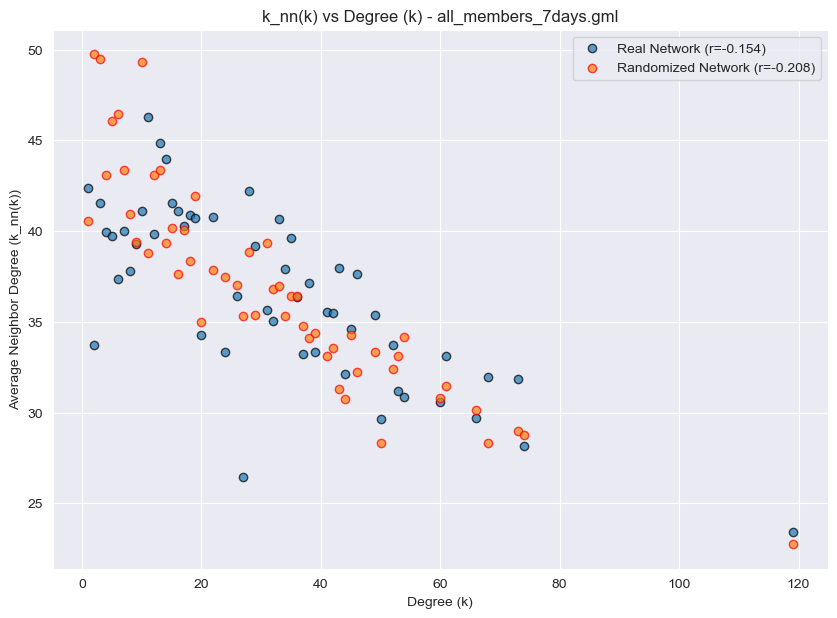

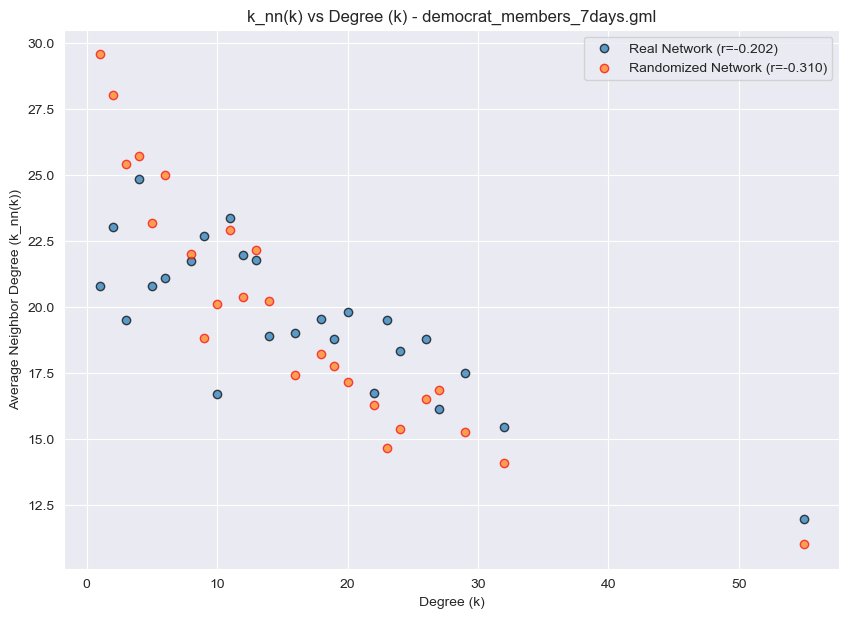

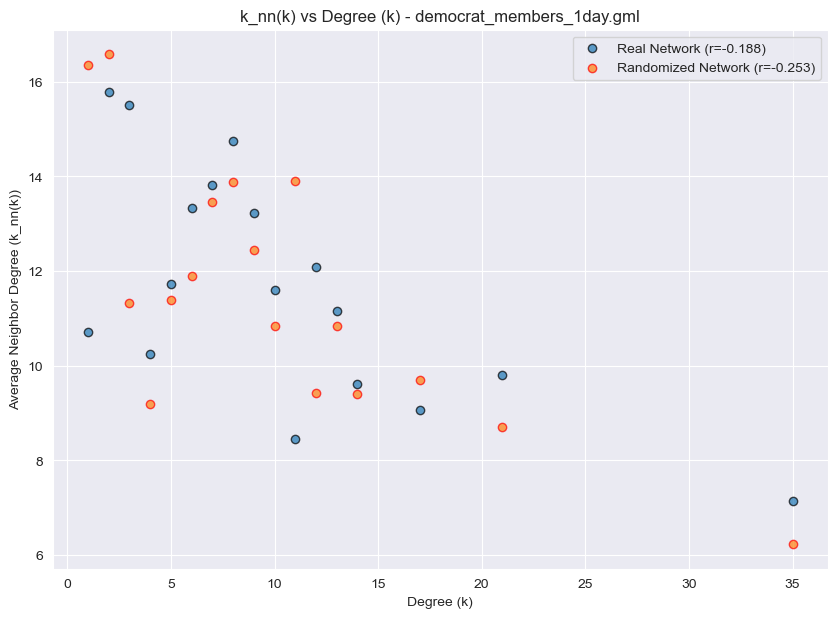

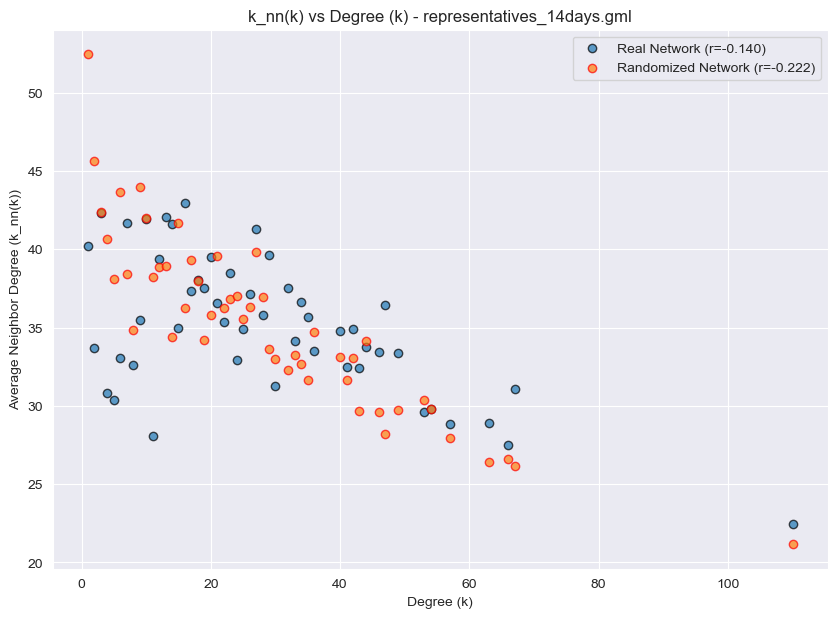

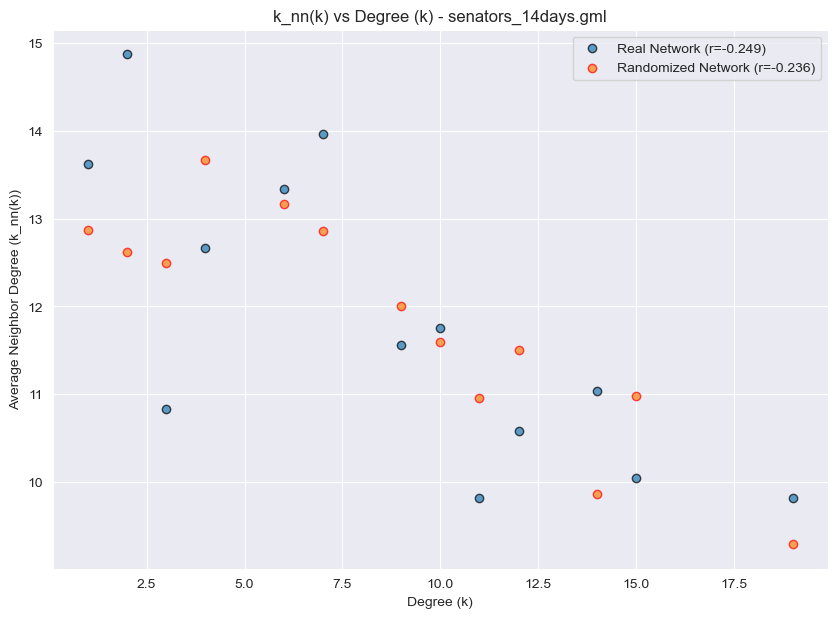

In [12]:
def calculate_knn_by_degree_simple(graph):
    """
    Calculates k_nn(k), the average neighbor degree grouped by node degree.
    
    :param graph: A NetworkX graph
    :return: Two lists - degrees (k) and average neighbor degree (k_nn(k))
    """
    # Use NetworkX's degree and average_neighbor_degree
    degree = dict(graph.degree())
    knn = nx.average_neighbor_degree(graph)
    
    # Group nodes by degree and calculate average k_nn for each degree
    degree_knn = {}
    for k in set(degree.values()):
        if k == 0:
            continue
        nodes_with_k = [node for node in graph.nodes() if degree[node] == k]
        degree_knn[k] = sum(knn[node] for node in nodes_with_k) / len(nodes_with_k)
    
    # Sort by degree for plotting
    sorted_degrees = sorted(degree_knn.keys())
    sorted_knn = [degree_knn[k] for k in sorted_degrees]
    return sorted_degrees, sorted_knn

def plot_knn_vs_degree_with_randomization(graphs, file_names):
    """
    Plots k_nn(k) vs degree k for real and randomized networks, including assortativity coefficient.
    
    :param graphs: List of NetworkX graphs
    :param file_names: List of graph file names for labeling
    """
    for graph, file_name in zip(graphs, file_names):
        # Real network
        degrees_real, knn_values_real = calculate_knn_by_degree_simple(graph)
        assortativity_real = nx.degree_assortativity_coefficient(graph)
        
        # Randomized network
        randomized_graph = nx.double_edge_swap(graph.copy(), nswap=2 * graph.number_of_edges(), max_tries=100 * graph.number_of_edges())
        degrees_rand, knn_values_rand = calculate_knn_by_degree_simple(randomized_graph)
        assortativity_rand = nx.degree_assortativity_coefficient(randomized_graph)
        
        # Plot
        plt.figure(figsize=(10, 7))
        plt.scatter(degrees_real, knn_values_real, alpha=0.7, edgecolors='k', label=f"Real Network (r={assortativity_real:.3f})")
        plt.scatter(degrees_rand, knn_values_rand, alpha=0.7, edgecolors='r', label=f"Randomized Network (r={assortativity_rand:.3f})")
        plt.xlabel("Degree (k)")
        plt.ylabel("Average Neighbor Degree (k_nn(k))")
        plt.title(f"k_nn(k) vs Degree (k) - {file_name}")
        plt.legend()
        plt.show()


plot_knn_vs_degree_with_randomization(graphs, gml_files)


In [15]:
import pandas as pd

def generate_graph_metrics_table(graphs, file_names):
    """
    Generates a table with metrics for each graph and its randomized version.
    
    :param graphs: List of NetworkX graphs
    :param file_names: List of graph file names for labeling
    :return: Pandas DataFrame with metrics
    """
    metrics = []
    for graph, file_name in zip(graphs, file_names):
        # Real network metrics
        nodes = graph.number_of_nodes()
        edges = graph.number_of_edges()
        avg_degree = sum(dict(graph.degree()).values()) / nodes
        assortativity_real = nx.degree_assortativity_coefficient(graph)
        clustering_real = nx.average_clustering(graph)
        
        # Randomized network metrics
        randomized_graph = nx.double_edge_swap(graph.copy(), nswap=2 * graph.number_of_edges(), max_tries=100 * graph.number_of_edges())
        assortativity_rand = nx.degree_assortativity_coefficient(randomized_graph)
        clustering_rand = nx.average_clustering(randomized_graph)
        
        # Append metrics
        metrics.append({
            "Graph": file_name,
            "Nodes": nodes,
            "Edges": edges,
            "Average Degree": avg_degree,
            "Assortativity": assortativity_real,
            "Randomized Assortativity": assortativity_rand,
            "Clustering Coefficient": clustering_real,
            "Randomized Clustering Coefficient": clustering_rand
        })
    
    # Create DataFrame
    metrics_df = pd.DataFrame(metrics)
    return metrics_df


generate_graph_metrics_table(graphs, gml_files)

,Graph,Nodes,Edges,Average Degree,Assortativity,Randomized Assortativity,Clustering Coefficient,Randomized Clustering Coefficient
0,republican_members_1day.gml,191,216,2.261780,-0.108877,-0.147645,0.118587,0.075521
1,republican_members_7days.gml,191,487,5.099476,-0.041908,-0.152191,0.243724,0.148251
2,republican_members_14days.gml,191,662,6.931937,-0.052949,-0.132363,0.315926,0.176967
3,representatives_7days.gml,292,1059,7.253425,-0.163219,-0.206129,0.275596,0.207326
4,senators_7days.gml,63,103,3.269841,-0.298415,-0.372123,0.236623,0.196087
5,representatives_1day.gml,292,427,2.924658,-0.143684,-0.185731,0.119940,0.085806
6,senators_1day.gml,63,51,1.619048,-0.183695,-0.391882,0.096083,0.070778
7,all_members_1day.gml,353,734,4.158640,-0.141909,-0.182592,0.149086,0.114472
8,all_members_14days.gml,353,2487,14.090652,-0.138663,-0.223125,0.359647,0.282459
9,democrat_members_14days.gml,159,566,7.119497,-0.190889,-0.262142,0.314842,0.276001
